# Import

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

from openbb_terminal.sdk import openbb, TerminalStyle
theme = TerminalStyle("dark", "dark", "dark")
## 가이드 문서 https://docs.openbb.co/sdk/usage/intros


# 시각화 도구
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='space')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (5,3)

# APIs

In [34]:
API_key_quandl = 'zhTdjaQhjNx2Y6s33C1o'
openbb.keys.quandl(key = API_key_quandl, persist = True)

'Defined, test passed'

In [3]:
API_key_fred = 'cfb4f49f5c1a9396f671b8049d992e56'
openbb.keys.fred(key = API_key_fred, persist = True)

'Defined, test passed'

# Dashboard

## Macro

In [4]:
indexes = pd.DataFrame.from_dict(openbb.economy.available_indices()).transpose()
## 상시조회 X
macro_prams = openbb.economy.macro_parameters() ## 메크로 조회가능 파라미터
macro_countries = openbb.economy.macro_countries() ## 메크로 조회가능 국가
## data, units, denomination = openbb.economy.macro([pram for pram in macro_prams])

## Government Defict/Suplus
## openbb.economy.balance_chart(['united_states', 'korea'])
## Government Dep to GDP
## openbb.economy.debt_chart(['united_states', 'korea'])

### Consumer Price Index(CPI)
## ccpi = openbb.economy.ccpi(['united_states', 'korea'], frequency = 'M', start_date = '1970-01-01')
## cpi = openbb.economy.cpi(['united_states', 'korea'], frequency = 'monthly') ## Long Term
## ccpi.iplot()

### Forecast of GDP

In [5]:
fgdp = openbb.economy.fgdp(['united_states', 'korea'])

In [6]:
fgdp.tail(10).iplot()

## Market

### Bonds

<Axes: ylabel=' '>

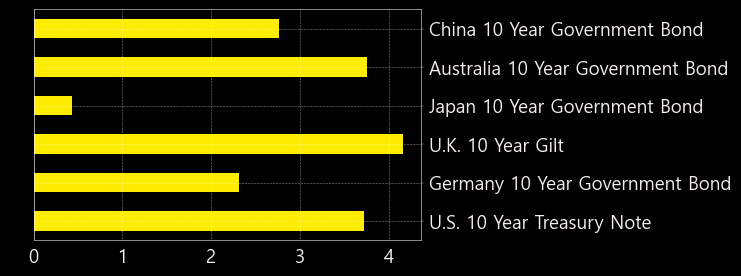

In [7]:
bonds = openbb.economy.glbonds().set_index(' ')
bonds['Yld (%)'].astype(float).plot(kind = 'barh')

In [8]:
## treasury_maturities = openbb.economy.treasury_maturities() ## treasury 조회가능 대상
## treasury = openbb.economy.treasury(instruments = ['nominal', 'inflation'], maturities = ['5y'], frequency = 'daily')

In [33]:
TB_rate_df, TB_names= openbb.economy.fred(['DGS20', 'DGS10', 'DGS2', 'DTB3', 'DFF'], start_date ='2020-01-01')
temp = TB_rate_df['2022-03-01':].T
temp.index = [240*4, 120*4, 24*4, 3*4, 1]
temp.columns = [f"D{n}" for n in range(len(temp.columns), 0, -1)]
temp[['D315', 'D240', 'D60', 'D20', 'D5', 'D1']].iplot()

### Stock

<Axes: ylabel=' '>

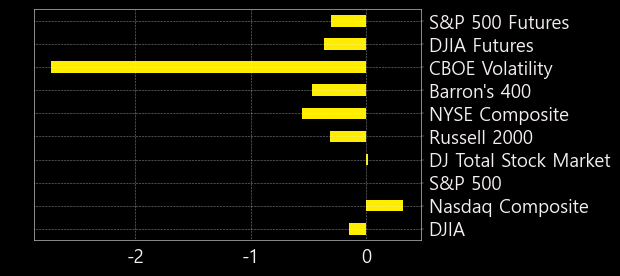

In [9]:
stocks = openbb.economy.indices().set_index(' ')
stocks['%Chg'].astype(float).plot(kind = 'barh')

In [10]:
## openbb.economy.perfmap() ## market map
openbb.economy.overview()

,,Price,Chg,%Chg
0,DJIA,33042.78,-50.56,-0.15
1,S&P 500,4205.52,0.07,0.00
2,Nasdaq Composite,13017.43,41.74,0.32
3,Japan: Nikkei 225,30840.09,-488.07,-1.56
4,UK: FTSE 100,7522.07,-105.13,-1.38
5,Crude Oil Futures,69.20,-0.26,-0.37
6,Gold Futures,1977.70,0.60,0.03
7,Yen,139.64,-0.16,-0.11
8,Euro,1.0700,-0.0035,-0.33


In [11]:
econ_groups = openbb.economy.get_groups() ## 조회가능 그룹
performance = openbb.economy.performance(group = 'sector')
revenue = openbb.economy.revenue(countries = ['united_states'])

In [12]:
## openbb.economy.search_index(['nasdaq']) ## 종합주가지수 탐색
openbb.economy.rtps()

,Sector,% Chg
0,Consumer Discretionary,0.76
1,Information Technology,0.63
2,Real Estate,0.27
3,Financials,0.00
4,Communication Services,-0.07
5,Industrials,-0.23
6,Utilities,-0.39
7,Materials,-0.59
8,Health Care,-0.67
9,Energy,-0.94


In [13]:
openbb.economy.valuation('sector')

,Name,MarketCap,P/E,FwdP/E,PEG,P/S,P/B,P/C,P/FCF,EPSpast5Y,EPSnext5Y,Salespast5Y,Change,Volume
0,Basic Materials,1834.24B,11.15,15.69,1.91,1.28,1.72,11.32,33.83,0.1840,0.0584,0.1190,-0.0104,3.541300e+08
1,Communication Services,6051.03B,24.88,17.57,1.41,2.51,3.12,14.53,44.64,0.1498,0.1771,0.1599,-0.0041,6.259700e+08
2,Consumer Cyclical,5957.97B,19.69,20.44,1.58,1.39,3.77,9.17,51.89,0.1079,0.1246,0.1935,0.0016,1.410000e+09
3,Consumer Defensive,3609.44B,23.45,20.54,3.06,1.16,4.44,23.34,83.82,0.0663,0.0766,0.0585,-0.0123,3.564900e+08
4,Energy,3208.95B,5.58,8.20,8.92,0.68,1.37,9.03,10.18,0.3969,0.0063,0.1432,-0.0129,5.106600e+08
5,Financial,8376.34B,12.38,11.83,1.48,2.12,1.04,0.51,14.41,0.1048,0.0836,0.0839,-0.0002,9.487800e+08
6,Healthcare,7214.55B,27.04,16.75,3.18,1.89,3.99,11.74,32.84,0.1079,0.0851,0.1492,-0.0085,1.290000e+09
7,Industrials,4540.62B,18.92,16.07,1.70,1.62,3.73,15.03,39.81,0.1165,0.1114,0.0670,-0.0020,6.824500e+08
8,Real Estate,1344.38B,28.97,26.56,2.99,3.82,1.96,21.09,84.43,0.1373,0.0970,0.1247,0.0028,3.446900e+08
9,Technology,13462.35B,34.75,23.59,2.69,4.57,7.32,17.33,45.27,0.1814,0.1292,0.1560,0.0047,1.910000e+09


### Futures

<Axes: ylabel=' '>

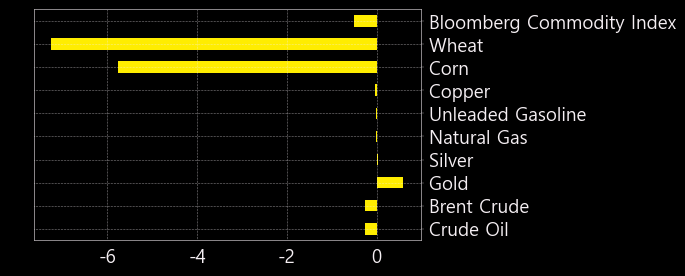

In [14]:
futures_summary = openbb.economy.futures('WSJ')
futures_summary = futures_summary.set_index(' ')
futures_summary['Chg'].astype(float).plot(kind = 'barh')

<Axes: ylabel='label'>

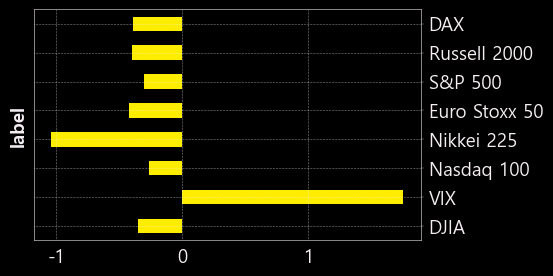

In [15]:
futures_index = openbb.economy.future('Indices')
futures_index['change'].astype(float).plot(kind = 'barh')

<Axes: ylabel='label'>

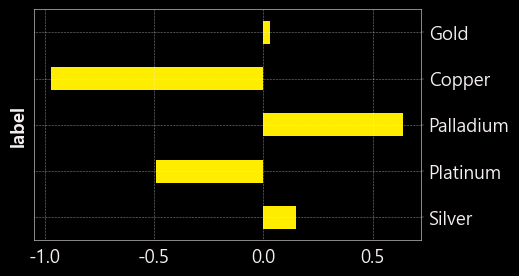

In [16]:
futures_commodity = openbb.economy.future('Metals')
futures_commodity['change'].astype(float).plot(kind = 'barh')

<Axes: ylabel='label'>

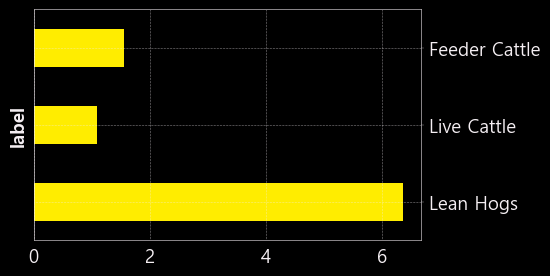

In [17]:
futures_meat = openbb.economy.future('Meats')
futures_meat['change'].astype(float).plot(kind = 'barh')

<Axes: ylabel='label'>

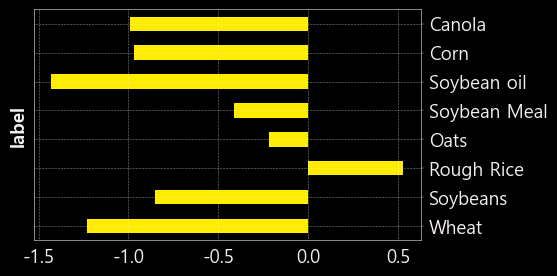

In [18]:
futures_grains = openbb.economy.future('Grains')
futures_grains['change'].astype(float).plot(kind = 'barh')

<Axes: ylabel='label'>

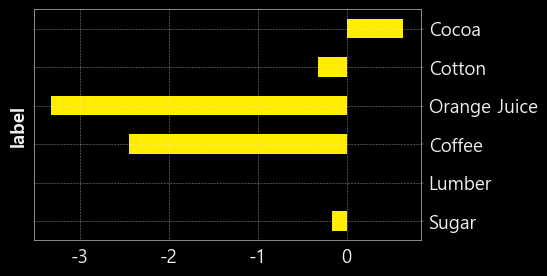

In [19]:
futures_softs = openbb.economy.future('Softs')
futures_softs['change'].astype(float).plot(kind = 'barh')

<Axes: >

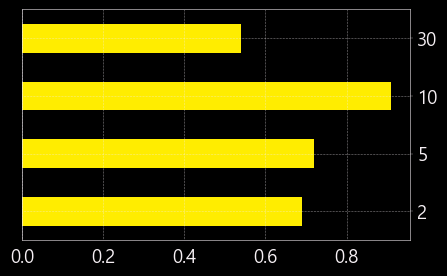

In [20]:
futures_bonds = openbb.economy.future('Bonds').reset_index()
futures_bonds.index = [2, 10 , 5, 30]
futures_bonds = futures_bonds.sort_index()
futures_bonds['change'].astype(float).plot(kind = 'barh')

<Axes: ylabel='label'>

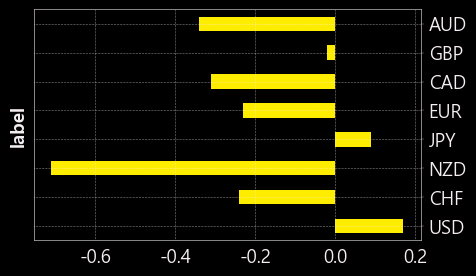

In [21]:
futures_currency = openbb.economy.future('Currencies')
futures_currency['change'].astype(float).plot(kind = 'barh')

## Events

In [22]:
openbb.economy.events(countries ='united_states', start_date = (dt.now()  - relativedelta(days=3)).strftime('%Y-%m-%d'))

,Time (ET),Country,Event,Actual,Consensus,Previous,Date
0,All Day,United States,United States - Memorial Day,-,-,-,2023-05-29
1,09:00,United States,House Price Index,3.6%,2.4%,4.2%,2023-05-30
2,09:00,United States,House Price Index,0.6%,0.2%,0.7%,2023-05-30
3,09:00,United States,House Price Index,398.0,393.0,395.5,2023-05-30
4,09:00,United States,S&P/CS HPI Composite - 20 s.a.,0.5%,-0.4%,-0.1%,2023-05-30
5,09:00,United States,S&P/CS HPI Composite - 20 n.s.a.,1.5%,0.4%,0.3%,2023-05-30
6,09:00,United States,S&P/CS HPI Composite - 20 n.s.a.,-1.1%,-1.6%,0.4%,2023-05-30
7,10:00,United States,CB Consumer Confidence,102.3,99.0,103.7,2023-05-30
8,10:30,United States,Dallas Fed Mfg Business Index,-29.1,-,-23.4,2023-05-30
9,11:30,United States,3-Month Bill Auction,5.300%,-,5.250%,2023-05-30
